In [164]:
import scipy as sp
import numpy as np
import pandas as pd
import os,sys
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer,TfidfTransformer
import matplotlib.pyplot as plt
import seaborn as sns
datasets=r'D:\雲科\資料探勘\資料探勘第三次作業\mini_newsgroups'
from nltk.corpus import stopwords
import nltk
from sklearn import cluster,metrics
import time
HHSTticks=time.process_time()
from sklearn.decomposition import TruncatedSVD
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage

In [165]:
orderedList=os.listdir(datasets)
texts=[]
labels_index={}
labels=[]

In [166]:
for p in orderedList:
    mypath=os.path.join(datasets,p)
    if os.path.isdir(mypath):
        label_id=len(labels_index)
        labels_index[p]=label_id
        for fname in sorted(os.listdir(mypath)):
            if fname.isdigit():
                fpath=os.path.join(mypath,fname)

In [167]:
if sys.version_info<(3,):
    f=open(fpath)
else:
    f=open(fpath,encoding='latin-1')
    t=f.read()
    u=t.find('\n\n')
    if 0<u:
            t=t[u:]
    texts.append(t)
    f.close()
    labels.append(label_id)

In [168]:
news_df=pd.DataFrame({'texts':texts})
news_df['clean_doc']=news_df['texts'].str.replace("[^a-zA-Z#]"," ")
news_df['clean_doc']=news_df['clean_doc'].apply(lambda x:' '.join([w for w in x.split() if len(w)>3]))
# news_df
news_df['clean_doc']=news_df['clean_doc'].apply(lambda x: x.lower())
# news_df
nltk.download('stopwords')
# news_df
stop_words=stopwords.words('english')
# news_df
tokenized_doc=news_df['clean_doc'].apply(lambda x:x.split())
# news_df
tokenized_doc=tokenized_doc.apply(lambda x:[item for item in x if item not in stop_words])
news_df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,texts,clean_doc
0,\n\nIn article <1993Apr27.073723.18577@csis.di...,article csis csiro csis csiro peter lamb write...


In [169]:
detokenized_doc=[]
for p in range(len(news_df)):
    t=' '.join(tokenized_doc[p])
    detokenized_doc.append(t)
    
# news_df['clean_doc']=detokenized_doc

aaalist = detokenized_doc[0].split(' ')

vectorizer = TfidfVectorizer(stop_words='english',
                            max_features=2000,
                            max_df=0.5,
                            smooth_idf=True)
X=vectorizer.fit_transform(aaalist)

In [170]:
svd_model=TruncatedSVD(n_components=20,algorithm='randomized',
                      n_iter=100,random_state=122)
svd_model.fit(X)

TruncatedSVD(n_components=20, n_iter=100, random_state=122)

In [171]:
X_topics=svd_model.fit_transform(X)

In [176]:
HHSTticks=time.process_time()
Hcluster=cluster. AgglomerativeClustering(n_clusters=20,linkage='average',affinity='l2')
Hcluster.fit(X_topics)
cluster_labels=Hcluster.labels_
HHEDticks=time.process_time()
print('階層式所花費的時間為:',HHEDticks-HHSTticks)

階層式所花費的時間為: 0.015625


In [173]:
def purity(X, cluster_labels):
    cluster = np.array(X)
    label = np. array(cluster_labels)
    indedata1 = {}
    for p in np.unique(label):
        indedata1[p] = np.argwhere(label == p)
    indedata2 = {}
    for q in np.unique(cluster):
        indedata2[q] = np.argwhere(cluster == q)

    count_all = []
    for i in indedata1.values():
        count = []
        for j in indedata2.values():
            a = np.intersect1d(i, j).shape[0]
            count.append(a)
        count_all.append(count)

    return sum(np.max(count_all, axis=0))/len(cluster)

In [174]:
purity(X_topics,cluster_labels)

21.83529411764706

{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [115.0, 115.0, 125.0, 125.0],
  [135.0, 135.0, 145.0, 145.0],
  [165.0, 165.0, 175.0, 175.0],
  [155.0, 155.0, 170.0, 170.0],
  [185.0, 185.0, 195.0, 195.0],
  [205.0, 205.0, 215.0, 215.0],
  [225.0, 225.0, 235.0, 235.0],
  [265.0, 265.0, 275.0, 275.0],
  [285.0, 285.0, 295.0, 295.0],
  [305.0, 305.0, 315.0, 315.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [355.0, 355.0, 365.0, 365.0],
  [385.0, 385.0, 395.0, 395.0],
  [375.0, 375.0, 390.0, 390.0],
  [360.0, 360.0, 382.5, 382.5],
  [405.0, 405.0, 415.0, 415.0],
  [425.0, 425.0, 435.0, 435.0],
  [445.0, 445.0, 455.0, 455.0],
  [430.0, 430.0, 450.0, 450.0],
  [475.0, 475.0, 485.0, 485.0],
  [465.0, 465.0, 480.0, 480.0],
  [505.0, 505.0, 515.0, 515.0],
  [495.0, 495.0, 510.0, 510.0],
  [535.0, 535.0, 545.0, 545.0],
  [555.0, 555.0, 565

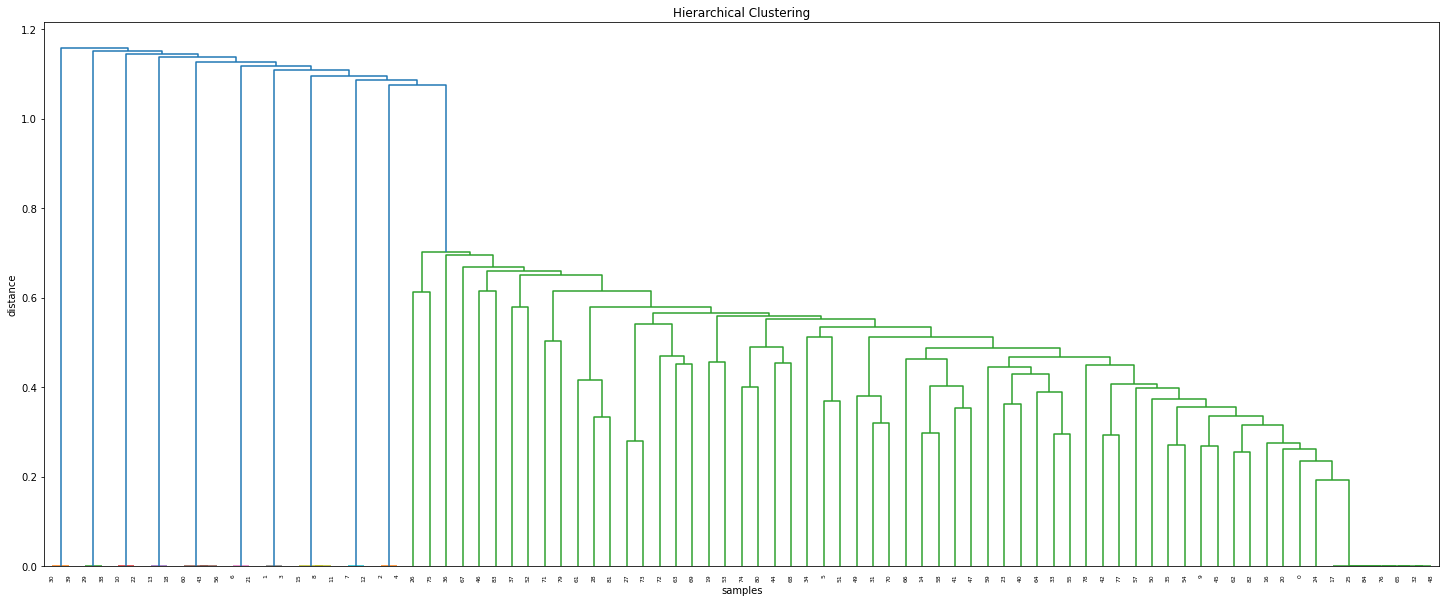

In [175]:
H = hierarchy.linkage(X_topics,'average')
plt.figure(figsize=(25,10))
plt.title('Hierarchical Clustering')
plt.xlabel('samples')
plt.ylabel('distance')
dendrogram(H)